In [39]:
# Import the necessary libraries.

import nltk
nltk.download('stopwords')
nltk.download('punkt')

# pandas turn raw data into a tabular form.
import pandas as pd

# numpy is for mathematical computation.
import numpy as np

# matplotlib is for data visualization.
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is for advanced data visualization.
import seaborn as sns

# stopwords get rid of the most common words in sentences that usualy any search engine ignore them.
# Most common words such as ( he, she, on, in the, this, etc.), they dont add any sentimental value.
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

# re is regular expression library that can match and filter any pattern.
import re

# PorterStemmer transform words back to their roots such as (loved, loves, hated, hates) to love, hate respectively.
from nltk.stem.porter import PorterStemmer

# word_tokenize to split reviews into words.
from nltk.tokenize import word_tokenize

# TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# train_test_split split 2 arrays into train and test sets, which allow us to train a model,
# on a portion of the data then test it on a different portion of data that model havent seen it before. 
from sklearn.model_selection import train_test_split, GridSearchCV

# halving_search_cv to Search over specified parameter values for a model with successive halving.
# its still experimental but its much faster then GridSearchCV.
from sklearn.experimental import enable_halving_search_cv

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunfi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunfi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
# load the imdb dataset csv file into a dataframe, and show the first 5 rows.

df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [41]:
# Show the shape of the dataframe, (number of rows, number of columns).

df.shape

(50000, 2)

In [42]:
# Show the dataframe information, including columns data types and if there are any missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [43]:
# Check if there are duplicate rows.

df.duplicated().sum()

418

In [44]:
# delete all the duplucate rows.

df = df.drop_duplicates()

In [45]:
# Show the number of values for each class in the sentiment columns.

df["sentiment"].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

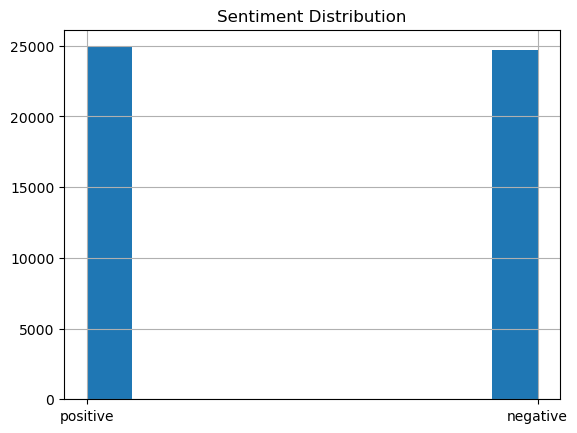

In [46]:
# Show a histogram for the positive and negative classes counts.

ax, fig = plt.subplots()
df["sentiment"].hist()
plt.title("Sentiment Distribution")

In [47]:
# Show the 1st 2 reviews by using a for loop.

for i in range(2):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [48]:
# Define a function to find the number of words in each review.
# The function take a review and split its words then return words count.

def words_num(rev):
    words = rev.split()
    count = len(words)
    return count

In [49]:
# Create a new column in the dataframe with the words count using apply function.
# apply take a function as a parameter and apply it on a dataframe series

df["words_count"] = df["review"].apply(words_num)

In [50]:
# Show changes in the dataframe.

df.head()

,review,sentiment,words_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [51]:
# Show summary statistics for word_counts grouped by sentiment.

df.groupby("sentiment")["words_count"].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,24698.0,229.596607,165.103430,4.0,128.0,174.0,278.0,1522.0
positive,24884.0,233.090620,177.688169,10.0,125.0,172.0,284.0,2470.0


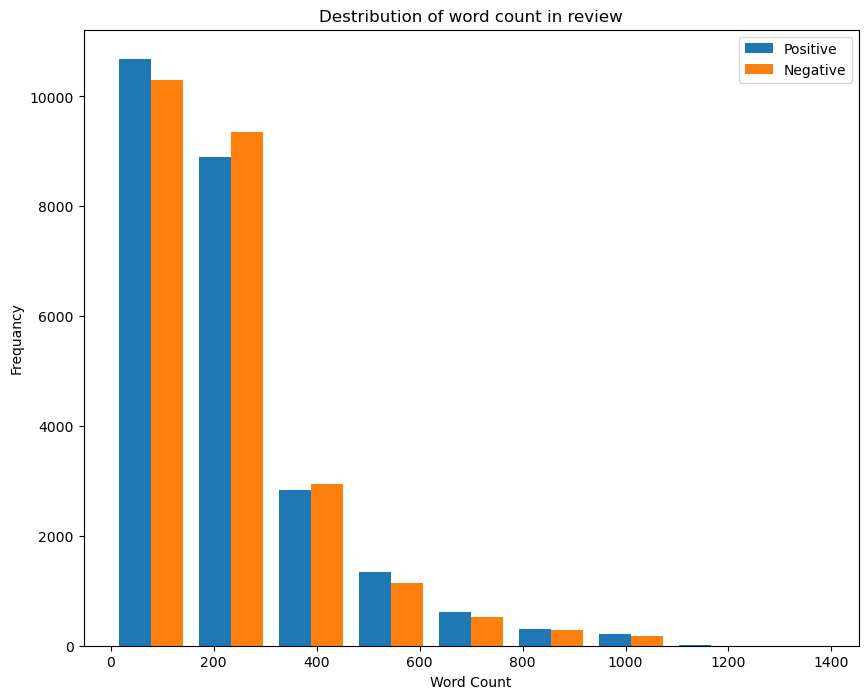

In [52]:
# Visualize the distribution of words in reviews using a stacked histogram.

fig, ax = plt.subplots(figsize=(10,8))

pos = df[df["sentiment"] == "positive"]["words_count"]
neg = df[df["sentiment"] == "negative"]["words_count"]
bins = np.linspace(0, 1400, 10)

ax.hist([pos, neg], bins, label=["Positive", "Negative"])
plt.xlabel("Word Count")
plt.ylabel("Frequancy")
plt.title("Destribution of word count in review")
plt.legend()

In [53]:
# Create a new column with sentiment mapped to numbers instead of strings and show the changes.
# Mapping (Positive = 1, Negative = 0)

df["sentiment_mapped"] = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0)
df.head()

,review,sentiment,words_count,sentiment_mapped
0,One of the other reviewers has mentioned that ...,positive,307,1
1,A wonderful little production. <br /><br />The...,positive,162,1
2,I thought this was a wonderful way to spend ti...,positive,166,1
3,Basically there's a family where a little boy ...,negative,138,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1


In [54]:
# Create a function to clean the review column using re library.

def data_cleaning(data):
    # Change all words to lower case.
    data = data.lower()
    # re.sub(pattern, replacement, dataframe.series).
    data = re.sub("<br /", ' ', data)
    data = re.sub(r"https\S+|www\S+|http\S+", ' ', data, flags=re.MULTILINE)
    data = re.sub("[^a-zA-Z]", ' ', data)
    # After finding the patterns and replacing them with empty spaces we split the words.
    data_tokens = word_tokenize(data)
    # Then use a list comprehension to get rid of most common words in english.
    cleaned_data = [i for i in data_tokens if not i in stop_words]
    # Finally return our words joined by a space.
    return " ".join(cleaned_data)

In [55]:
# Apply the function above on the review column and show 1st review.

df["review"] = df["review"].apply(data_cleaning)
print("Review no. 1:", "\n", df["review"].iloc[0])

Review no. 1: 
 one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due la

In [57]:
# Use PorterStemmer to get words roots.

stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [59]:
# Apply the changes on the review column.

df["review"] = df["review"].apply(lambda x: stemming(x))

In [60]:
# redo word counts after the changes.

df["words_count"] = df["review"].apply(words_num)

In [63]:
# Use counter which is bag of word algorithm  that assign each word with its appearing frequency.

# Create 2 objects for 1 for each of the 2 classes.
pos_rev = df[df["sentiment_mapped"] == 1]
neg_rev = df[df["sentiment_mapped"] == 0]

# Import the Counter library.
from collections import Counter

# Assign each object from above to the call of Counter.
pos_count = Counter()
neg_count = Counter()


# Do a 2 for loops, each loop through each review then loop through each word and split the words.
# Then each time the same word appears, it adds 1 to our objects, like in a dictionary {word: count}.
for i in pos_rev["review"].values:
    for w in i.split():
        pos_count[w] +=1

for j in neg_rev["review"].values:
    for word in j.split():
        neg_count[word] +=1

In [74]:
# Create a dataframe for the most common positive words and thier counts.

pos_df = pd.DataFrame.from_records(pos_count.most_common(), columns=["word", "count"])
pos_df.head()

,word,count
0,film,41968
1,movie,37659
2,one,27210
3,like,17651
4,good,14966


In [75]:
# Install and import circlify to build a circle chart

!pip install circlify
import circlify

# create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d


# Compute circle positions.
circles = circlify.circlify(pos_df['count'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = pos_df['count'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

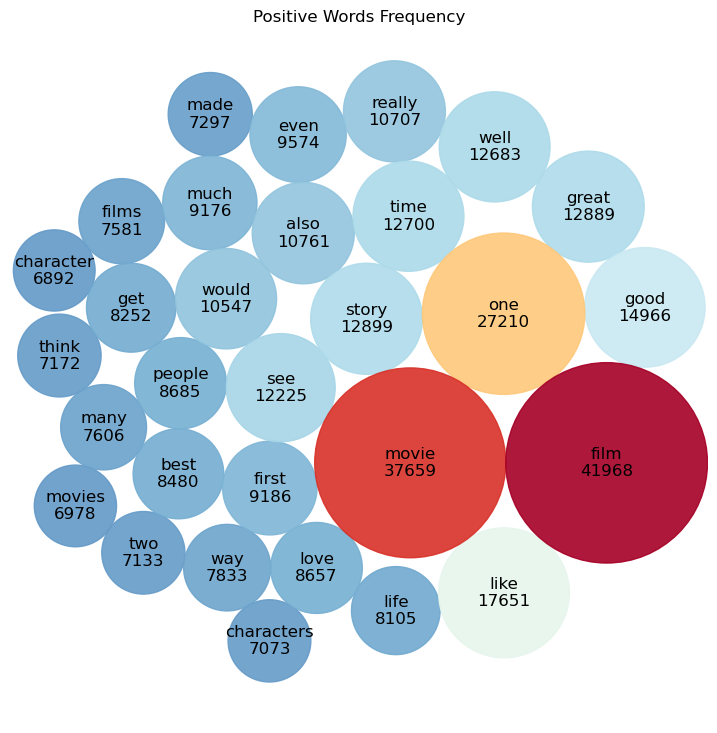

In [76]:
# Visualize the 1st 30 rows from the Positive dataframe on a cirlce chart.

fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(pos_df['word'][0:30])
counts = list(pos_df['count'][0:30])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.title("Positive Words Frequency")
plt.show()

In [77]:
# Create a dataframe for the most common negative words and thier counts.

neg_df = pd.DataFrame.from_records(neg_count.most_common(), columns=["word", "count"])
neg_df.head()

,word,count
0,movie,49618
1,film,37180
2,one,25995
3,like,22192
4,even,15095


In [78]:
# Compute circle positions.
circles = circlify.circlify(neg_df['count'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = neg_df['count'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

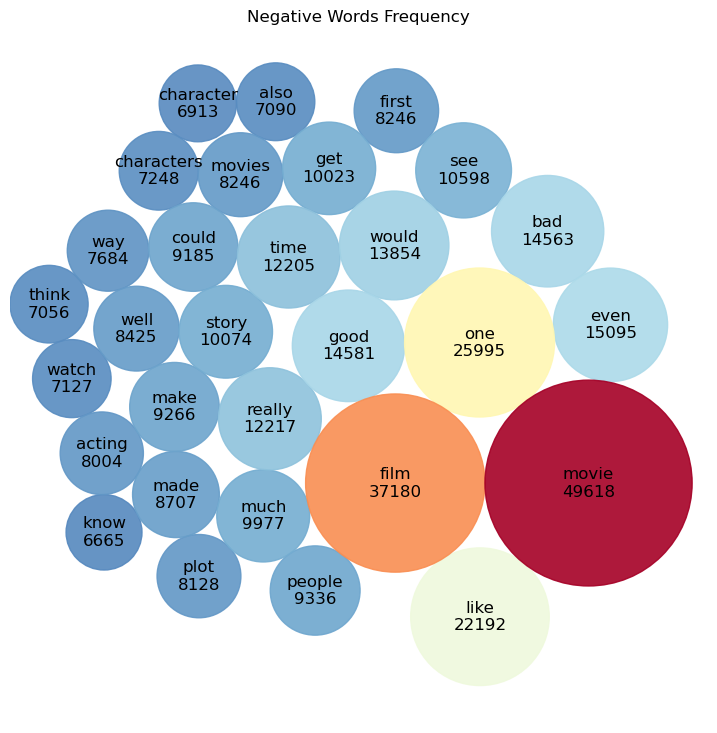

In [79]:
# # Visualize the 1st 30 rows from the negative dataframe on a cirlce chart.

fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(neg_df['word'][0:30])
counts = list(neg_df['count'][0:30])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.title("Negative Words Frequency")
plt.show()

In [80]:
# Create the target and the predictor arrays as X, y.

X = df["review"]
y = df["sentiment_mapped"]


In [81]:
# Convert X to matrix of TF-IDF features.

vector = TfidfVectorizer()
X = vector.fit_transform(df["review"])

In [82]:
# Create the train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [85]:
# Show shapes of training and testing sets to make sure everything is right before modeling.

print("Size of X_train: ", (X_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of X_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of X_train:  (34707, 99093)
Size of y_train:  (34707,)
Size of X_test:  (14875, 99093)
Size of y_test:  (14875,)


In [86]:
# Import models.

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Import validations
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Classification Report 

               precision    recall  f1-score   support

           0       0.91      0.88      0.89      7476
           1       0.88      0.92      0.90      7399

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875
 



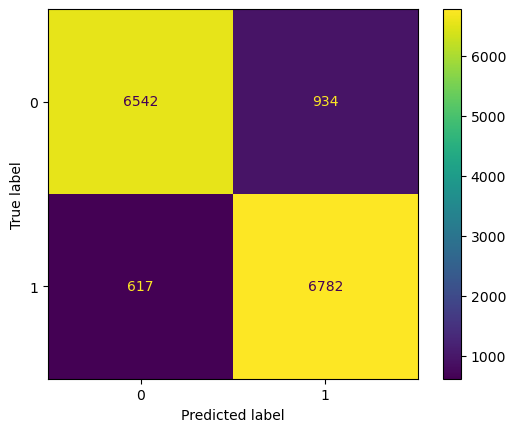

In [87]:
# Create LogisticRegression model.

lr_model = LogisticRegression(random_state=7, n_jobs=-1)
lr_model.fit(X_train, y_train)

# Commenting out GridSearchCV fitting so it will not run again

# create a parameter grid for GidSearchCv.

# param_grid = {"solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

# Use gridsearchcv to find the optimal hyper parameters for the model and do a 10 fold cross validation. 
# gs = GridSearchCV(lr_model, param_grid=param_grid, scoring="accuracy", cv=10) 

# gs.fit(X_train, y_train)

# print(gs.best_params_)

lr_pred = lr_model.predict(X_test)

# Create Classification Report and visualize a Confusion Matrix.

cm = confusion_matrix(y_test, lr_pred, labels = lr_model.classes_)
print("Classification Report", "\n\n", classification_report(y_test, lr_pred), "\n")
print(ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_).plot())





Classification Report 

               precision    recall  f1-score   support

           0       0.92      0.88      0.90      7476
           1       0.88      0.92      0.90      7399

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875
 



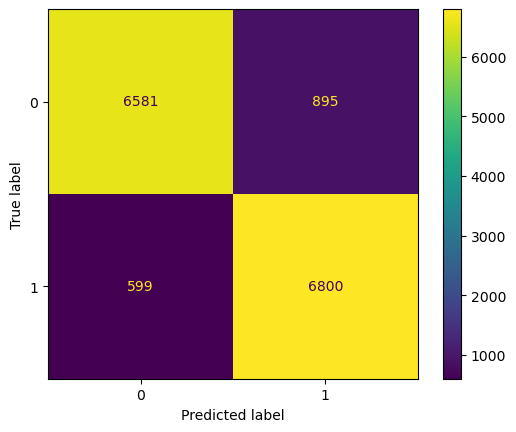

In [88]:
# Create SGDClassifier model.

sgd_model = SGDClassifier(loss="modified_huber", random_state=7, n_jobs=-1)

sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)

# Commenting out GridSearchCV fitting so it will not run again

# Cs = [0.0001,0.001, 0.01, 0.1, 1, 10]
# Ls = ["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"]
# param_grid = {'alpha': Cs, "loss": Ls}
# gs = GridSearchCV(sgd_model, param_grid=param_grid, scoring="accuracy", cv=10, n_jobs=-1) 

# gs.fit(X_train, y_train)

# print(gs.best_params_)

# Create Classification Report and visualize a Confusion Matrix.

cm = confusion_matrix(y_test, sgd_pred, labels = sgd_model.classes_)
print("Classification Report", "\n\n", classification_report(y_test, sgd_pred), "\n")
print(ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_model.classes_).plot())


Classification Report 

               precision    recall  f1-score   support

           0       0.86      0.85      0.85      7476
           1       0.85      0.86      0.85      7399

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875
 



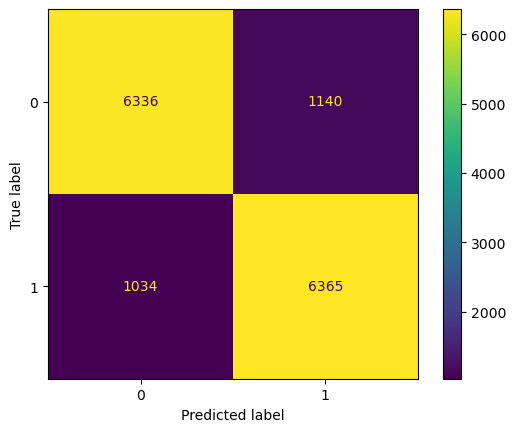

In [89]:
# Create a RandomForestClassifier model.

rf_model = RandomForestClassifier(n_jobs=-1, random_state=7)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Create Classification Report and visualize a Confusion Matrix.

cm = confusion_matrix(y_test, rf_pred, labels = rf_model.classes_)
print("Classification Report", "\n\n", classification_report(y_test, rf_pred), "\n")
print(ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_).plot())

Classification Report 

               precision    recall  f1-score   support

           0       0.87      0.87      0.87      7476
           1       0.87      0.87      0.87      7399

    accuracy                           0.87     14875
   macro avg       0.87      0.87      0.87     14875
weighted avg       0.87      0.87      0.87     14875
 



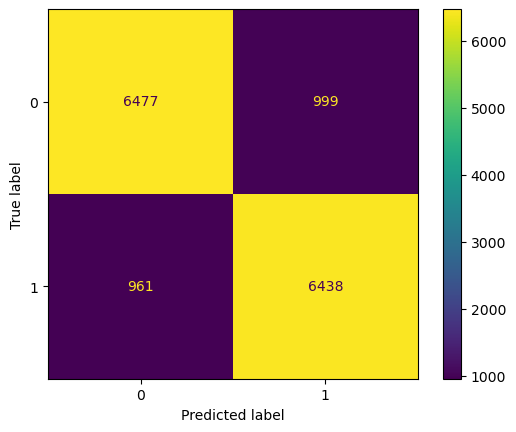

In [90]:
# Create a MultinomialNB model.

mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)

# Create Classification Report and visualize a Confusion Matrix.

cm = confusion_matrix(y_test, mnb_pred, labels = mnb_model.classes_)
print("Classification Report", "\n\n", classification_report(y_test, mnb_pred), "\n")
print(ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb_model.classes_).plot())

Classification Report 

               precision    recall  f1-score   support

           0       0.91      0.88      0.89      7476
           1       0.88      0.91      0.90      7399

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875
 



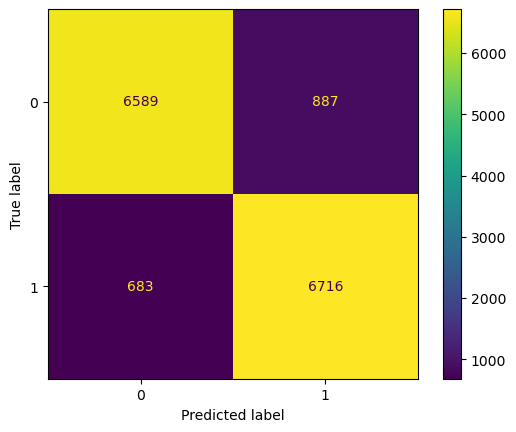

In [91]:
# create a LinearSVC model

svc_model = LinearSVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

# Create Classification Report and visualize a Confusion Matrix.

cm = confusion_matrix(y_test, svc_pred, labels = svc_model.classes_)
print("Classification Report", "\n\n", classification_report(y_test, svc_pred), "\n")
print(ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_model.classes_).plot())

Classification Report 

               precision    recall  f1-score   support

           0       0.88      0.87      0.87      7476
           1       0.87      0.88      0.87      7399

    accuracy                           0.87     14875
   macro avg       0.87      0.87      0.87     14875
weighted avg       0.87      0.87      0.87     14875
 



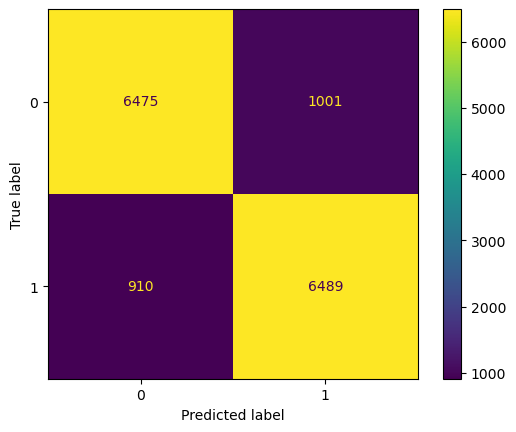

In [92]:
# Create MLPClassifier model.

mlp_model = MLPClassifier(activation="relu", alpha=0.005, early_stopping=False, hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.0001, max_iter=300, solver="adam", random_state=7)

# Commenting out the gridsearch fitting, it took quite a while to find the optimal parameters that give the best score, which are below.

# {'activation': 'relu', 'alpha': 0.005, 'early_stopping': False, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate_init': 0.0001, 'max_iter': 300, 'solver': 'adam'}
# param_grid = [
#     {'solver': ['adam'],
#      'learning_rate_init': [0.0001],
#      'max_iter': [300],
#      'hidden_layer_sizes': [(50, 100, 150), (100, 100, 100), (100, 50, 100)],
#      'activation': ['logistic', 'tanh', 'relu'],
#      'alpha': [0.0001, 0.001, 0.005],
#      'early_stopping': [True, False]
#      }
# ]

# halving_cv = HalvingGridSearchCV(mlp_model, param_grid, scoring="accuracy", n_jobs=-1, min_resources="exhaust", factor=3, verbose=3, random_state=3, cv=2)
# halving_cv.fit(X_train, y_train)

# # Return set of parameters with the best performance.
# print(halving_cv.best_params_)

# Return the performance metric score.
# print(halving_cv.best_score_)

mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

# Create Classification Report and visualize a Confusion Matrix.

cm = confusion_matrix(y_test, mlp_pred, labels = mlp_model.classes_)
print("Classification Report", "\n\n", classification_report(y_test, mlp_pred), "\n")
print(ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_model.classes_).plot())



# Conclusion
### Logistic regression is a good model because it trains quickly even on large datasets and provides very robust results.

### I believe that Multi layer perceptron would do as good just with tuning its parameters and increasing its hiddin layer size, but it will also require much more time and computing.

### Which lead us to the main point simple models are always better to use than complicated ones also much faster and gives the same or better accuracy in some cases